In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
 #import pandas
import pandas as pd
col_names = ['Record_ID',	'Auction_ID',	'Bidder_Tendency',	'Bidding_Ratio',	'Successive_Outbidding',	'Last_Bidding',	'Auction_Bids',	'Starting_Price_Average',	'Early_Bidding',	'Winning_Ratio',	'Auction_Duration']
# load dataset
data=pd.read_csv('/content/Shill Bidding Dataset (1).csv')

In [165]:
print(data)

      Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
0             1         732         0.200000       0.400000   
1             2         732         0.024390       0.200000   
2             3         732         0.142857       0.200000   
3             4         732         0.100000       0.200000   
4             5         900         0.051282       0.222222   
...         ...         ...              ...            ...   
6316      15129         760         0.333333       0.160000   
6317      15137        2481         0.030612       0.130435   
6318      15138        2481         0.055556       0.043478   
6319      15139        2481         0.076923       0.086957   
6320      15144        2481         0.016393       0.043478   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
0                       0.0      0.000028      0.000000   
1                       0.0      0.013123      0.000000   
2                       0.0      0.003042      0.000000   
3      

In [166]:
data.shape

(6321, 12)

In [167]:
data.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [168]:
#checking the missing values in the data
data.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [169]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

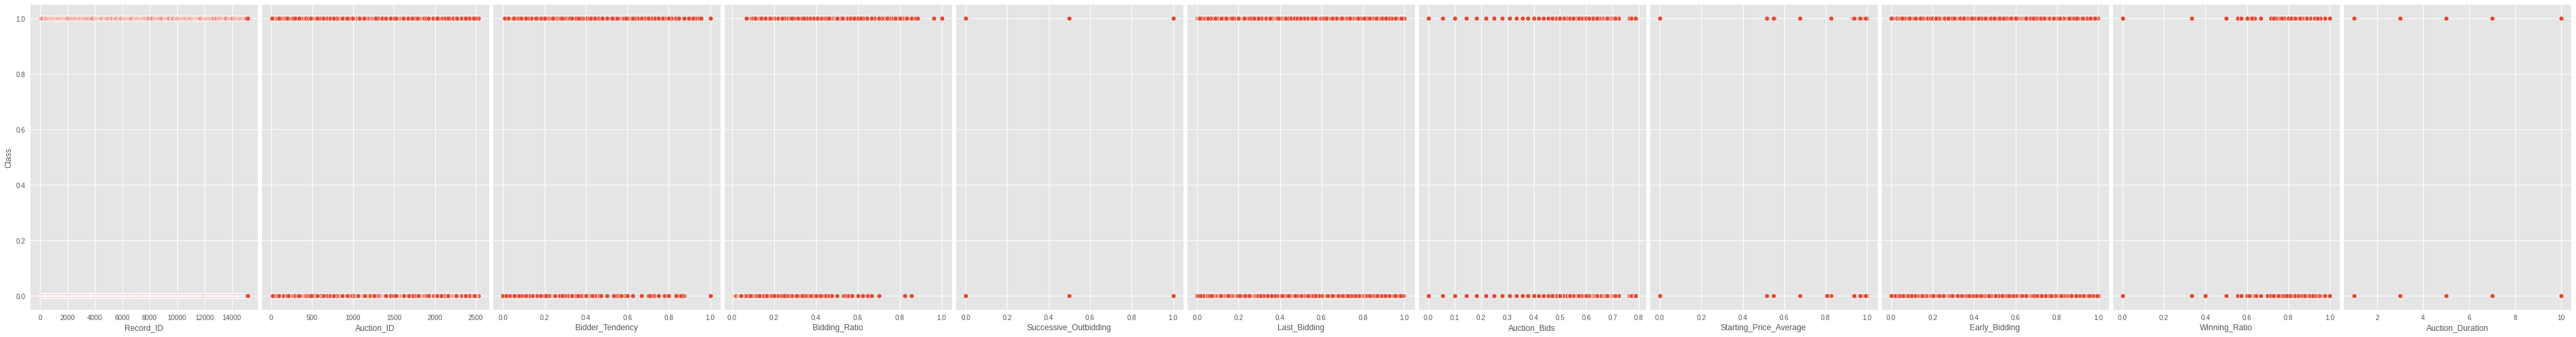

In [161]:
sns.pairplot(data, x_vars=['Record_ID',	'Auction_ID',	'Bidder_Tendency',	'Bidding_Ratio',	'Successive_Outbidding',	'Last_Bidding',	'Auction_Bids',	'Starting_Price_Average',	'Early_Bidding',	'Winning_Ratio',	'Auction_Duration'], y_vars='Class', height=7, aspect=0.7);

In [170]:
 #split dataset in features and target variable
feature_cols = ['Record_ID',	'Auction_ID',	'Bidder_Tendency',	'Bidding_Ratio',	'Successive_Outbidding',	'Last_Bidding',	'Auction_Bids',	'Starting_Price_Average',	'Early_Bidding',	'Winning_Ratio',	'Auction_Duration']
X = data[feature_cols] # Features
y = data.Class # Target variable

In [171]:
#importing train test split to create vadidation set 
from sklearn.model_selection import train_test_split

In [172]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.30)

In [173]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_valid)

In [174]:
#distribution in training set
y_train.value_counts(normalize=True)

0    0.893309
1    0.106691
Name: Class, dtype: float64

In [175]:
#distribution in validation set
y_valid.value_counts(normalize=True)

0    0.892989
1    0.107011
Name: Class, dtype: float64

In [176]:
#shape of training set
x_train.shape, y_train.shape

((4424, 11), (4424,))

In [177]:
#shape of validation set
x_valid.shape, y_valid.shape

((1897, 11), (1897,))

In [178]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)
cnf_matrix

array([[1694,    0],
       [ 203,    0]])

In [179]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

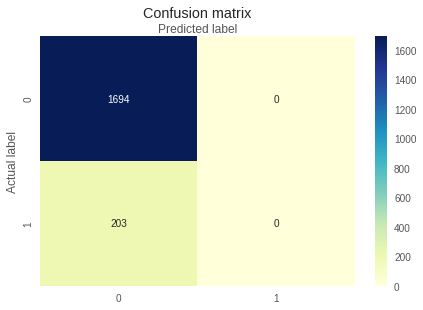

In [180]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [181]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))
print("Precision:",metrics.precision_score(y_valid, y_pred))
print("Recall:",metrics.recall_score(y_valid, y_pred))

Accuracy: 0.8929889298892989
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


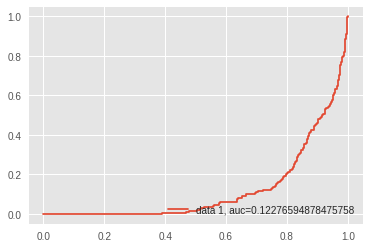

In [182]:
y_pred_proba = logreg.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

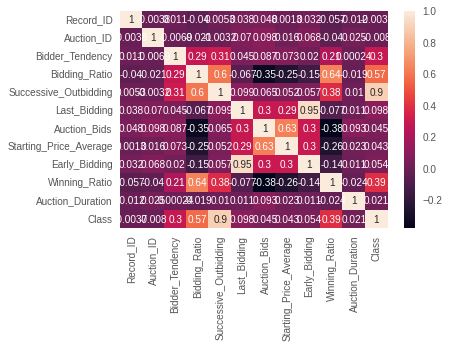

In [183]:
sns.heatmap(data.corr(), annot=True)